#Importing Libraries

In [1]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from spacy import displacy
import pandas as pd
from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
krs = tf.keras
import numpy as np
from wordcloud import WordCloud

#Text

In [2]:
text = "Here you can write your own text or upload it. Only for my test I need to write a longer sentence with some proper name as Paula who greets you from Poland. Would be nice if some words were duplicated. Sentences contain words. Words contain letters. Remember, it is a nice project to play with words."

#Tokanization

In [3]:
# my program help you divide text into tokens (units)

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
tokens = word_tokenize(text)

In [6]:
print(tokens)

['Here', 'you', 'can', 'write', 'your', 'own', 'text', 'or', 'upload', 'it', '.', 'Only', 'for', 'my', 'test', 'I', 'need', 'to', 'write', 'a', 'longer', 'sentence', 'with', 'some', 'proper', 'name', 'as', 'Paula', 'who', 'greets', 'you', 'from', 'Poland', '.', 'Would', 'be', 'nice', 'if', 'some', 'words', 'were', 'duplicated', '.', 'Sentences', 'contain', 'words', '.', 'Words', 'contain', 'letters', '.', 'Remember', ',', 'it', 'is', 'a', 'nice', 'project', 'to', 'play', 'with', 'words', '.']


#Lemmatization

In [7]:
# my program can laminate your text

In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
doc = nlp(text)

In [10]:
lemmatized_tokens = [i.lemma_ for i in doc]

In [11]:
print(lemmatized_tokens)

['here', 'you', 'can', 'write', 'your', 'own', 'text', 'or', 'upload', 'it', '.', 'only', 'for', 'my', 'test', 'I', 'need', 'to', 'write', 'a', 'long', 'sentence', 'with', 'some', 'proper', 'name', 'as', 'Paula', 'who', 'greet', 'you', 'from', 'Poland', '.', 'would', 'be', 'nice', 'if', 'some', 'word', 'be', 'duplicate', '.', 'sentence', 'contain', 'word', '.', 'word', 'contain', 'letter', '.', 'remember', ',', 'it', 'be', 'a', 'nice', 'project', 'to', 'play', 'with', 'word', '.']


# Named Entity Recognition (NER)

In [12]:
#here you can  identify named entities in your text

In [13]:
displacy.render(doc, style="ent", jupyter=True)

#Parts of Speech (POS) and Dependency

In [14]:
# now we can support you with parts of speech - it was always a pain in the lessons

In [15]:
data = {
    'Word' : [i.text for i in doc],
    'POS' : [i.pos_ for i in doc],
    'Dependency' : [i.dep_ for i in doc]
}


In [16]:
POS_df = pd.DataFrame(data)

In [17]:
POS_df

,Word,POS,Dependency
0,Here,ADV,advmod
1,you,PRON,nsubj
2,can,AUX,aux
3,write,VERB,ROOT
4,your,PRON,poss
...,...,...,...
58,to,PART,aux
59,play,VERB,relcl
60,with,ADP,prep
61,words,NOUN,pobj


#Remove stop word

In [18]:
#you can show text without stop words

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [21]:
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

In [22]:
result_text = ' '.join(filtered_tokens)

In [23]:
removed_stop_words = [word for word in tokens if word.lower() in stop_words]

In [24]:
print("Text after removing stop words:", result_text)
print("Removed stop words:", removed_stop_words)

Text after removing stop words: write text upload . test need write longer sentence proper name Paula greets Poland . Would nice words duplicated . Sentences contain words . Words contain letters . Remember , nice project play words .
Removed stop words: ['Here', 'you', 'can', 'your', 'own', 'or', 'it', 'Only', 'for', 'my', 'I', 'to', 'a', 'with', 'some', 'as', 'who', 'you', 'from', 'be', 'if', 'some', 'were', 'it', 'is', 'a', 'to', 'with']


#Frequency

In [25]:
# to check words frequency, it is good idea to remove stop words first

In [26]:
words = word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()]
words = [word for word in words if word not in stop_words]

In [27]:
  freq_dist = FreqDist(words)

In [28]:
print("Top 15 words:")
for word, frequency in freq_dist.most_common(15):
  print(f"{word}: {frequency}")

Top 15 words:
words: 4
write: 2
nice: 2
contain: 2
text: 1
upload: 1
test: 1
need: 1
longer: 1
sentence: 1
proper: 1
name: 1
paula: 1
greets: 1
poland: 1


In [29]:
#vizualization - chart will be more interesting if you add better text ;)

In [30]:
words, frequency = zip(*freq_dist.most_common(15))

<ipython-input-31-8950359e8d7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=frequency, palette='mako')


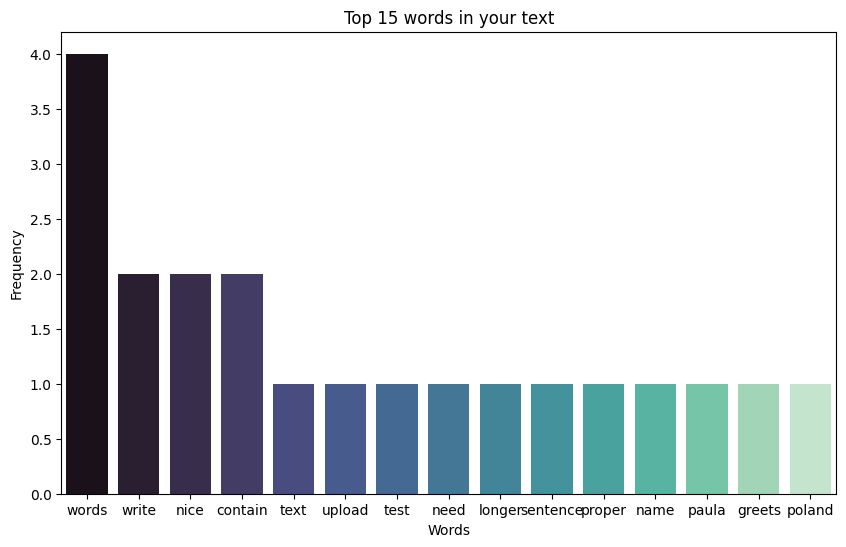

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=frequency, palette='mako')
plt.title("Top 15 words in your text")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

#Bag of Words

In [32]:
# for Bag of Words you need several texts. In my example wikipedia is useful

In [33]:
text_BOW = ["The bag-of-words model is a model of text which uses a representation of text that is based on an unordered collection of words",
            "It is used in natural language processing and information retrieval (IR)",
             "It disregards word order (and thus any non-trivial notion of grammar) but captures multiplicity.",
            "The bag-of-words model has also been used for computer vision.",
            "The bag-of-words model is commonly used in methods of document classification where, for example, the (frequency of) occurrence of each word is used as a feature for training a classifier."
            ]

In [34]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(text_BOW)

In [35]:
words = vectorizer.get_feature_names_out()

In [36]:
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=words)

In [37]:
bow_df

,also,an,and,any,as,bag,based,been,but,captures,...,training,trivial,unordered,used,uses,vision,where,which,word,words
0,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,2
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,1,0,0,2,0,0,1,0,1,1


#Term Frequency–Inverse Document Frequenc (TF-IDF)

In [38]:
# it is a measure of importance of a word to a document in a collection, adjusted for the fact that some words appear more frequently in general.

In [39]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text])

In [40]:
words = vectorizer.get_feature_names_out()

In [41]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)

In [42]:
print("TF-IDF DataFrame:")
tfidf_df

TF-IDF DataFrame:


,as,be,can,contain,duplicated,for,from,greets,here,if,...,to,upload,were,who,with,words,would,write,you,your
0,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.222222,0.111111,0.111111,0.111111,0.222222,0.444444,0.111111,0.222222,0.222222,0.111111


In [43]:
top_words = tfidf_df.sum().sort_values(ascending=False).head(15)

In [44]:
#this chart will  make more sense if you add longer text

<ipython-input-45-246e7cd2c199>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette="mako")


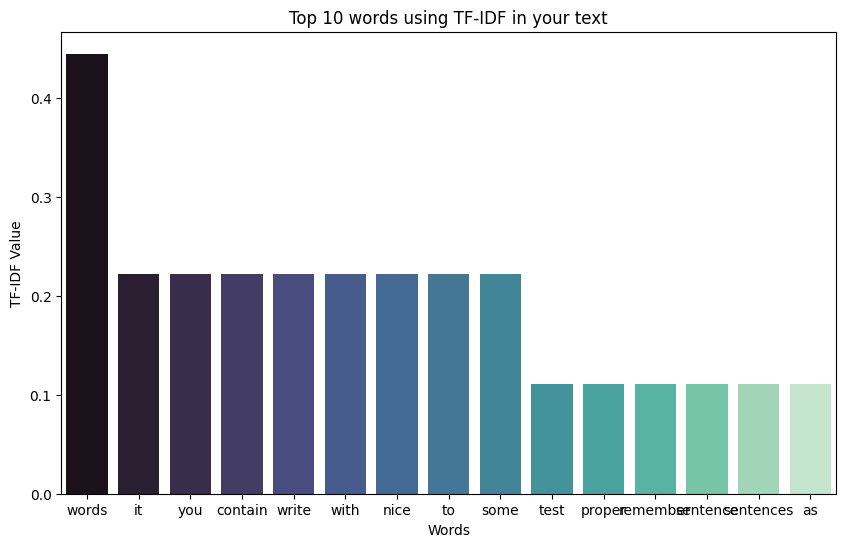

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.index, y=top_words.values, palette="mako")
plt.title("Top 10 words using TF-IDF in your text")
plt.xlabel("Words")
plt.ylabel("TF-IDF Value")
plt.show()

#Bigrams

In [46]:
#it is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words.
#The frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications

In [47]:
def generate_bigrams(text):
  words = text.split()
  bigrams =[(words[i], words[i+1]) for i in range(len(words)-1)]
  return bigrams

In [48]:
result_bigrams = generate_bigrams(text)

In [49]:
print("Bigramy:", result_bigrams)

Bigramy: [('Here', 'you'), ('you', 'can'), ('can', 'write'), ('write', 'your'), ('your', 'own'), ('own', 'text'), ('text', 'or'), ('or', 'upload'), ('upload', 'it.'), ('it.', 'Only'), ('Only', 'for'), ('for', 'my'), ('my', 'test'), ('test', 'I'), ('I', 'need'), ('need', 'to'), ('to', 'write'), ('write', 'a'), ('a', 'longer'), ('longer', 'sentence'), ('sentence', 'with'), ('with', 'some'), ('some', 'proper'), ('proper', 'name'), ('name', 'as'), ('as', 'Paula'), ('Paula', 'who'), ('who', 'greets'), ('greets', 'you'), ('you', 'from'), ('from', 'Poland.'), ('Poland.', 'Would'), ('Would', 'be'), ('be', 'nice'), ('nice', 'if'), ('if', 'some'), ('some', 'words'), ('words', 'were'), ('were', 'duplicated.'), ('duplicated.', 'Sentences'), ('Sentences', 'contain'), ('contain', 'words.'), ('words.', 'Words'), ('Words', 'contain'), ('contain', 'letters.'), ('letters.', 'Remember,'), ('Remember,', 'it'), ('it', 'is'), ('is', 'a'), ('a', 'nice'), ('nice', 'project'), ('project', 'to'), ('to', 'play')

#WordCloud

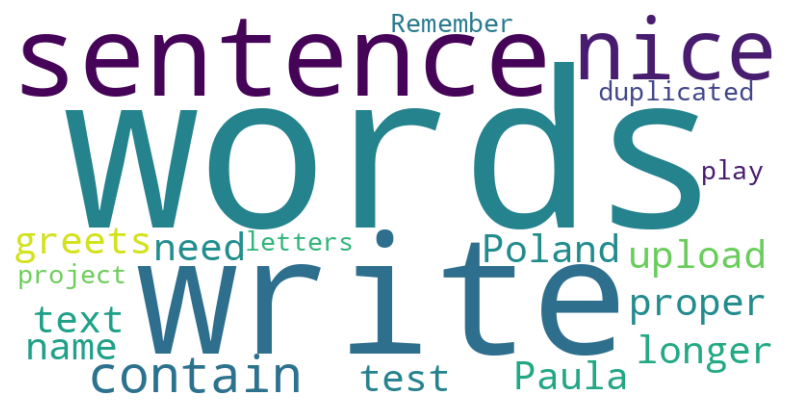

In [50]:
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Emebedding

In [51]:
# simple text

In [95]:
texts_emb= ("Anna is very kind and friendly person",
            "Anna is always ready to help others",
            "Anna loves animals and she has dog",
            "John is incredibly intelligent and friendly person",
             "John is also an excellent team player",
            "John is an avid traveler and kind",
       )

labels = np.array( [0] * 3 + [1] * 3 )

In [96]:
tokenizer = krs.preprocessing.text.Tokenizer()

In [97]:
tokenizer.fit_on_texts(texts_emb)

In [98]:
words_id = tokenizer.texts_to_sequences(texts_emb)

In [99]:
words_id

[[3, 1, 9, 5, 2, 6, 7],
 [3, 1, 10, 11, 12, 13, 14],
 [3, 15, 16, 2, 17, 18, 19],
 [4, 1, 20, 21, 2, 6, 7],
 [4, 1, 22, 8, 23, 24, 25],
 [4, 1, 8, 26, 27, 2, 5]]

In [100]:
tokenizer.word_index

{'is': 1,
 'and': 2,
 'anna': 3,
 'john': 4,
 'kind': 5,
 'friendly': 6,
 'person': 7,
 'an': 8,
 'very': 9,
 'always': 10,
 'ready': 11,
 'to': 12,
 'help': 13,
 'others': 14,
 'loves': 15,
 'animals': 16,
 'she': 17,
 'has': 18,
 'dog': 19,
 'incredibly': 20,
 'intelligent': 21,
 'also': 22,
 'excellent': 23,
 'team': 24,
 'player': 25,
 'avid': 26,
 'traveler': 27}

In [101]:
num_words = max(tokenizer.word_index.values())+1

In [83]:
#random seed

In [102]:
krs.utils.set_random_seed(123)

In [61]:
#modelling

In [103]:
model = krs.Sequential()

In [104]:
model.add(
    krs.layers.Embedding(
        input_dim=num_words,
        output_dim=2,
        input_length=7
    )
)

In [105]:
model.add(krs.layers.Flatten())

In [106]:
model.add(krs.layers.Dense(1, activation='sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 7, 2)              56        
                                                                 
 flatten_2 (Flatten)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


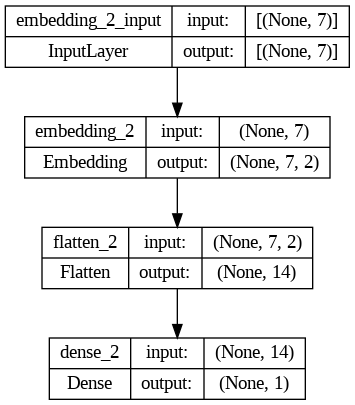

In [109]:
krs.utils.plot_model(model, show_shapes=True)

In [110]:
model.fit(np.array(words_id), labels, epochs=10, batch_size=2)

Epoch 1/10
3/3 [==============================] - 1s 6ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.8333
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.8333
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 1.0000


In [111]:
embed_layer = model.layers[0]


In [112]:
embed_weights = embed_layer.get_weights()[0]

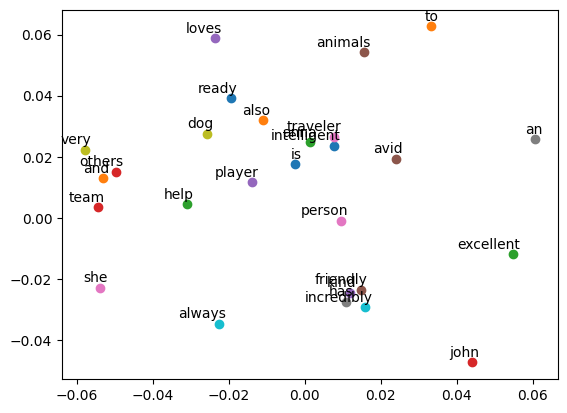

In [113]:
for word, index in tokenizer.word_index.items():
    x = embed_weights[index, 0]
    y = embed_weights[index, 1]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords="offset points", ha='right', va='bottom')
plt.show()